# Jump Start 2
First set up environment as usual don't forget
**SHIFT-ENTER** to run cells

In [1]:
%matplotlib notebook
from pylab import *
from lmfit import Model, report_fit

:0: FutureWarning: IPython widgets are experimental and may change in the future.


Read that data again from *sample.csv*

In [2]:
data = loadtxt('sample.csv',delimiter=',')

In [3]:
print(data)

[[ 1.   2.2]
 [ 2.   2.3]
 [ 3.   2.5]
 [ 4.   2.9]
 [ 5.   3.7]
 [ 6.   4.9]
 [ 7.   6.3]
 [ 8.   8.1]]


Display the dimensions of the *data* array

In [4]:
data.shape

(8, 2)

Show only the first two rows of the array - Indexing example

In [5]:
print(data[:2,:])

[[ 1.   2.2]
 [ 2.   2.3]]


Break data variable into x and y 1-D arrays

In [6]:
x = data[:,0]
y = data[:,1]

In [7]:
print(x)
print(y)

[ 1.  2.  3.  4.  5.  6.  7.  8.]
[ 2.2  2.3  2.5  2.9  3.7  4.9  6.3  8.1]


Let's try to make a simple plot

<IPython.core.display.Javascript object>


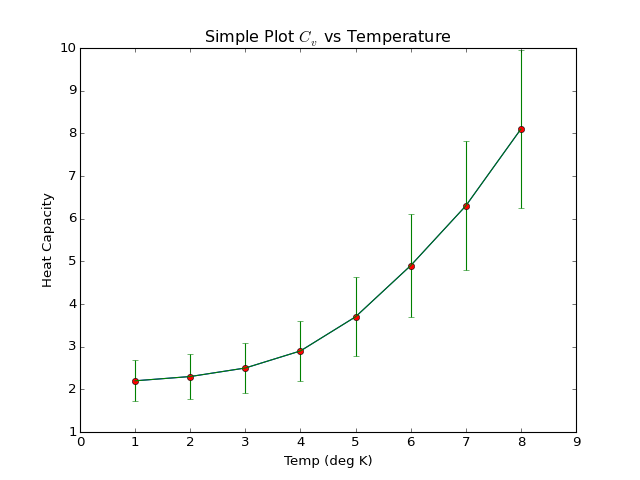

In [8]:
plot(x,y)

For great plotting examples look at [Matplotlib site](http://matplotlib.org); for docs on plot command [Go HERE](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)

Let add data points as red 'r' dots 'o' to the plot above

In [9]:
plot(x,y,'or')

Let do more plot decorations, such as title axes labels

In [10]:
title('Simple Plot $C_v$ vs Temperature')
xlabel('Temp (deg K)')
ylabel('Heat Capacity')

Make a dummy set of error bars by taking a square root of y-array minus 1

In [11]:
print(y)

[ 2.2  2.3  2.5  2.9  3.7  4.9  6.3  8.1]


In [12]:
errb = sqrt(y)-1

Now plot error bars

In [13]:
errorbar(x,y,errb)

<Container object of 3 artists>

If necessary, adjust the range of x or y axis using *xlim*

In [14]:
xlim((0,9))

(0, 9)

### Let's try to do curve fitting

First we create a new figure and plot our data

<IPython.core.display.Javascript object>


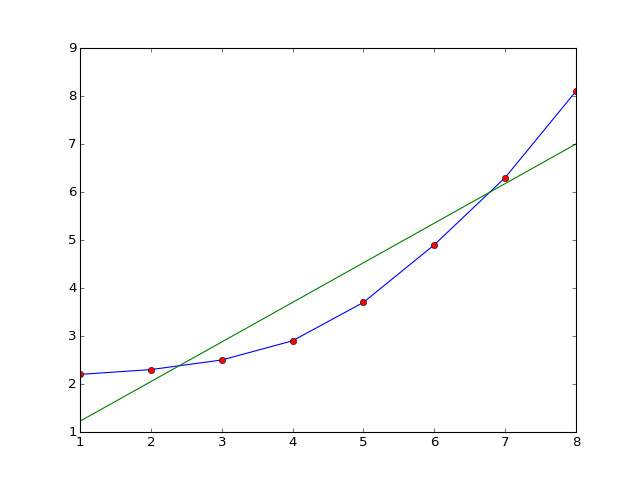

In [15]:
figure()
plot(x,y)
plot(x,y,'or')

Let's fit this to *y = mx + b*

In [16]:
def linear(x,m=1,b=1):
    return m*x + b

Define model and do the fit

In [17]:
lmodel = Model(linear)

result = lmodel.fit(y,x=x)

In [18]:
report_fit(result)

[[Fit Statistics]]
    # function evals   = 6
    # data points      = 8
    # variables        = 2
    chi-square         = 3.902
    reduced chi-square = 0.650
[[Variables]]
    m:   0.82500000 +/- 0.124443 (15.08%) (init= 1)
    b:   0.40000000 +/- 0.628407 (157.10%) (init= 1)
[[Correlations]] (unreported correlations are <  0.100)
    C(m, b)                      = -0.891 


In [19]:
plot(x,result.best_fit)

Let's try a plot of residuals

<IPython.core.display.Javascript object>


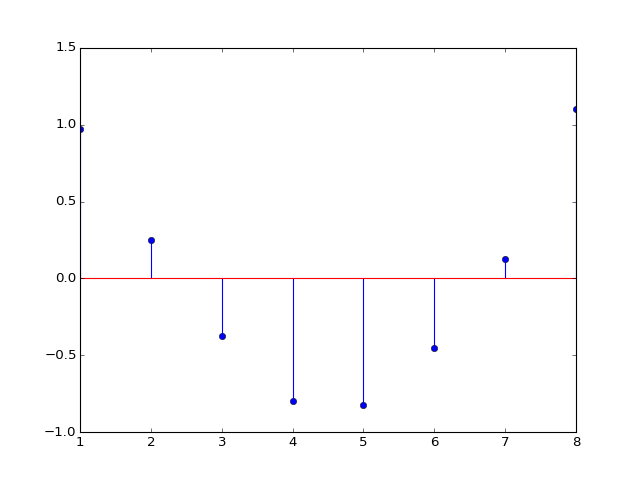

<Container object of 3 artists>

In [25]:
figure()
stem(x,y-result.best_fit)